# CRM - Análise de Campanha de Marketing

Este notebook tem como objetivo realizar a análise exploratória dos dados

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
import warnings
from scipy.stats import chi2_contingency
from scipy.stats import chi2

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
sns.set()

In [2]:
# draw multiples plot from a specific seaborn function
def multi_plot(df, cols, func, total_cols=4, **kwargs):
    total_rows = math.ceil(len(cols) / 4)
    fig, axes = plt.subplots(total_rows, total_cols, figsize=(24,6))
    
    for i, col in enumerate(cols):
        ax = axes.ravel()
        func(ax=ax[i], data=df, x=col, **kwargs)

    fig.tight_layout()

# verify chi-square correlation
def chi2_check(crosstab, prob=0.95):
    stat, p, dof, expected = chi2_contingency(crosstab)
    critical = chi2.ppf(prob, dof)

    print('probability=%.5f, critical=%.5f, stat=%.5f' % (prob, critical, stat))

    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

    # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.5f, p=%.5f' % (alpha, p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    

## Arquivos

In [3]:
df = pd.read_csv('ml_project1_data.csv')

## Análise Exploratória dos Dados

#### Análise Inicial

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
print('Duplicados: ',  df.duplicated(subset='ID').sum())

Duplicados:  0


In [6]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [7]:
df.describe(exclude=('int', 'float')).T

,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864
Dt_Customer,2240,663,2012-08-31,12


In [8]:
print('Tipos Marital_Status: ', df['Marital_Status'].unique())
print('Tipos Education: ', df['Education'].unique())
print('Cliente mais antigo: ', df['Dt_Customer'].min())
print('Cliente mais recente: ', df['Dt_Customer'].max())
print('Data da ultima medição de recência: ',  max(pd.to_datetime(df['Dt_Customer'], format='%Y-%m-%d') + 
                                                   pd.to_timedelta(df['Recency'], unit='D')))

Tipos Marital_Status:  ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Tipos Education:  ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Cliente mais antigo:  2012-07-30
Cliente mais recente:  2014-06-29
Data da ultima medição de recência:  2014-10-04 00:00:00


In [9]:
df.isnull().sum() / df.shape[0]

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 0.010714
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


A partir da análise inicial vamos:
- Criar as variáveis __*Age*__ e __*AgeRange*__ que representaram a idade e faixa etária do cliente
- Criar a variável __*TotalChild*__ tanto Kidhome quanto Teenhome representam o total de filhos em casa;
- Criar a variável __*DaysCustomer*__ que representará o total de dias desde que o cliente fez o cadastro;
- Criar a variável __*Monetary*__ que representará o total gasto pelo cliente;
- Criar a variável __*MntPurchase*__ que representará o total de transações realizadas pelo cliente;
- Criar a variável __*ProdPurchase*__ que representará a média do valor gasto por transação;
- Criar a variável __*PurchaseCustomerDay*__ que representará a media de transações por dia do cliente;
- Criar a variável __*MntAccepted*__ que representará o total de vezes que o cliente aceitou à campanha antes da target;
- Tratar os nulos e outliers da variável __*Income*__, por ser uma váriavel possívelmente importante para a análise, por indicar o poder de compra do cliente, vamos realizar uma imputação. *O valor ganho com ou não o totla de filhos afeta a compra do produto?*;
- Remover __*Z_CostContact*__ e __*Z_Revenue*__ por serem constantes.
- Se obtivermos o maior valor da soma entre a data de cadastro do cliente com a quantidade de dias da recência teremos o último dia que a recência foi calculada. Usaremos essa data como base para os cálculos da DaysCustomer e AgeRange.

In [11]:
df = df.drop(columns=['Z_CostContact', 'Z_Revenue'])

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%Y-%m-%d') 
baseline_date = max(df['Dt_Customer'] + pd.to_timedelta(df['Recency'], unit='D'))

df['Age'] = baseline_date.year - df['Year_Birth']
df['AgeRange'] = pd.cut(df['Age'], 
                        bins=[0, 14, 24, 64, np.inf], 
                        labels=['Children', 'Youth', 'Adults', 'Senior'],
                        right=False,
                        include_lowest=True
                        )

df['TotalChild'] = df['Kidhome'] + df['Teenhome']
df['DaysCustomer'] = (baseline_date - df['Dt_Customer']).dt.days
df['Monetary'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['MntPurchase'] = df[['NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].sum(axis=1)
df['ProdPurchase'] = df['Monetary'] / df['MntPurchase']
df['PurchaseCustomerDay'] = df['ProdPurchase'] / df['DaysCustomer']
df['MntAccepted'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

In [12]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,AgeRange,TotalChild,DaysCustomer,Monetary,MntPurchase,ProdPurchase,PurchaseCustomerDay,MntAccepted
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,Adults,0,760,1617,21,77.000000,0.101316,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,Adults,2,210,27,8,3.375000,0.016071,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,Adults,0,409,776,16,48.500000,0.118582,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,Adults,1,236,53,10,5.300000,0.022458,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,Adults,1,258,422,14,30.142857,0.116833,0


#### Distribuição dos dados

##### Variáveis Qualitativas

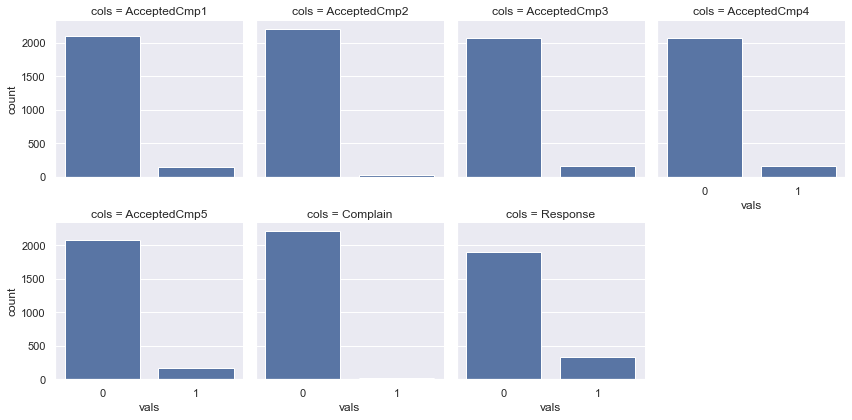

In [13]:
cat_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
            'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 
            'Response']
cat_var = df[cat_cols].melt(var_name='cols', value_name='vals')

df_facegrid = sns.FacetGrid(cat_var, col='cols', col_wrap=4, height=3)
df_facegrid.map(sns.countplot, 'vals', order=[0, 1])


In [14]:
print(f'Aqueles que aceitaram a última campanha equivalem à {round(df[df["Response"] == 1].shape[0] / df.shape[0] * 100, 2)}% do dataset')

Aqueles que aceitaram a última campanha equivalem à 14.91% do dataset


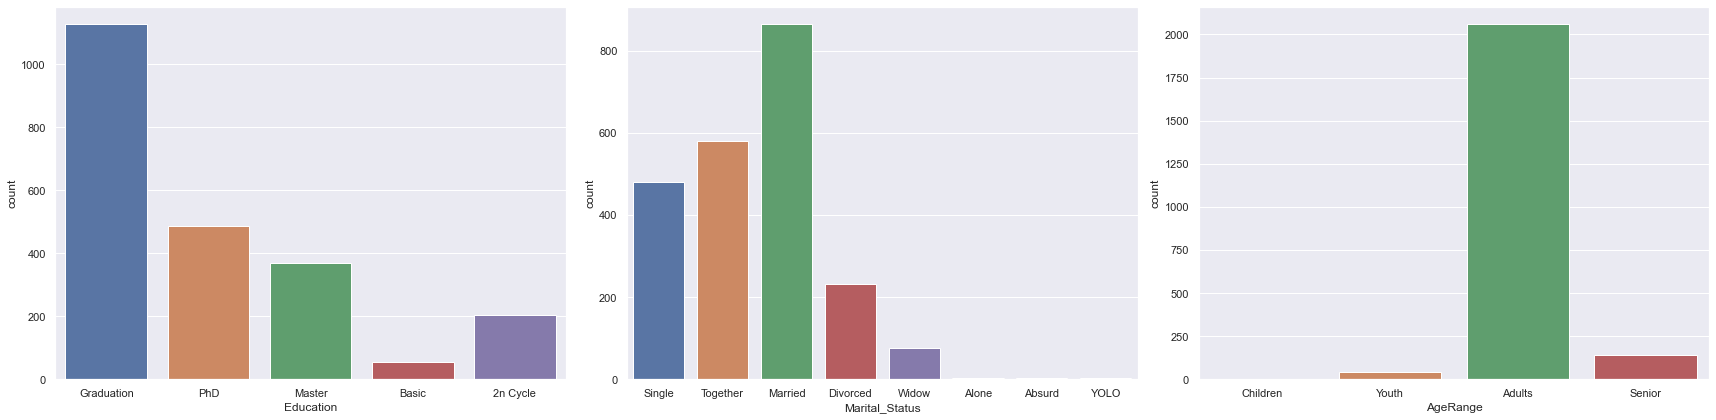

In [15]:
cat_cols = ['Education', 'Marital_Status', 'AgeRange']
multi_plot(df, cat_cols, sns.countplot, 3)

Sobre a análise dos dados categóricos:
- Todas as variáveis binárias estão desbalanceadas, atenção especial na Response(target);
- Em Martial_Status alone, absurd e YOLO tem valores tão pequenos que podem ser convertidos para Single. (Ou, até mesmo manter apenas duas labels: 0 para quem não possui um companheiro(a) e 1 para quem possui);
- Em Martial_Status Divorced e Window representam alguém que estava em um relacionamento estável, vamos junta-lás na label Divorced_Widow;
- Os clientes são adultos com mais de 24 anos em sua maiori;
- Education é uma variável categórica ordinal, ao invés de criar dummies podemos substituir por inteiros de forma gradual. 

In [16]:
df['Marital_Status'] = df['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO'], 'Single')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow'], 'Divorced_Widow')

##### Variáveis Quantitativas

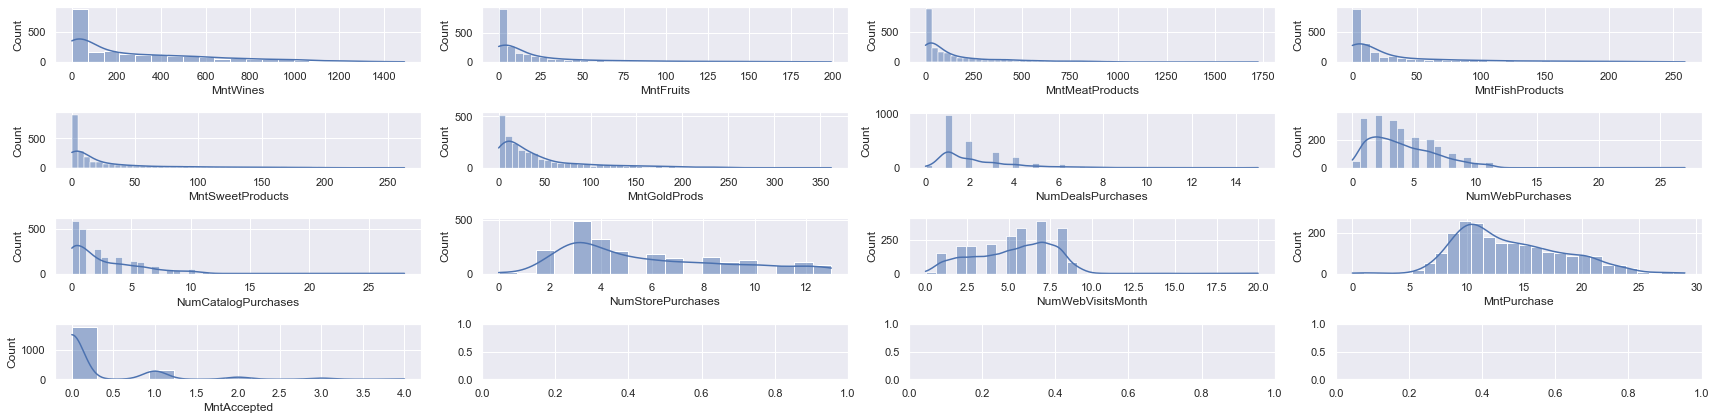

In [17]:
num_cols = [col for col in df.columns if col.startswith('Mnt') or col.startswith('Num')]

multi_plot(df, num_cols, sns.histplot, kde=True)

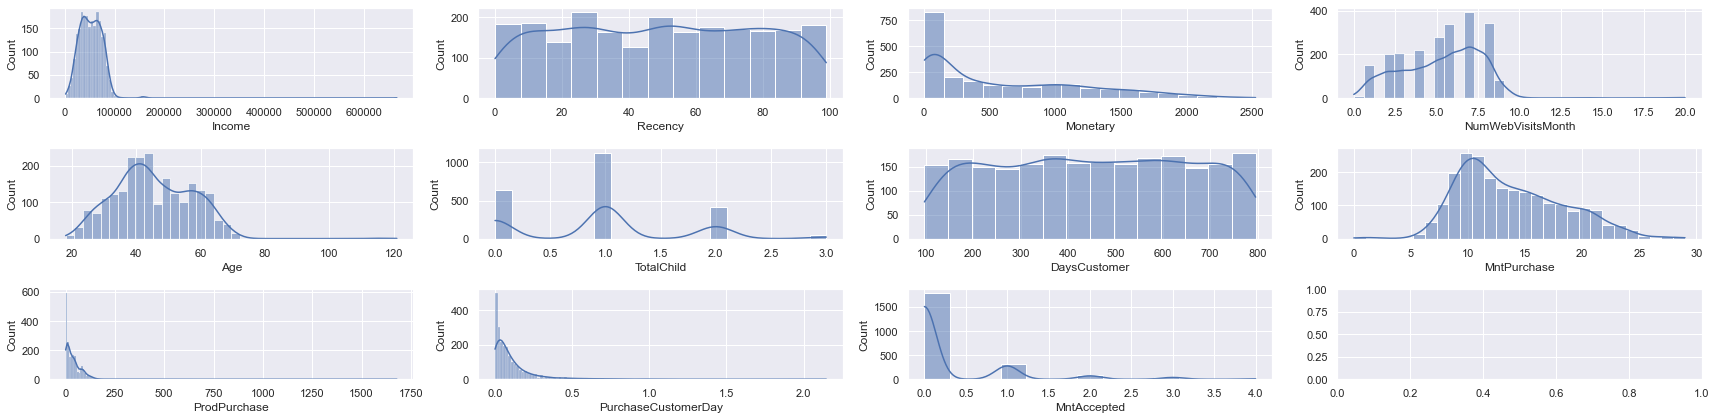

In [18]:
num_cols = ['Income', 'Recency', 'Monetary', 'NumWebVisitsMonth', 'Age', 
            'TotalChild', 'DaysCustomer', 'MntPurchase', 'ProdPurchase', 
            'PurchaseCustomerDay', 'MntAccepted']

multi_plot(df, num_cols, sns.histplot, kde=True)

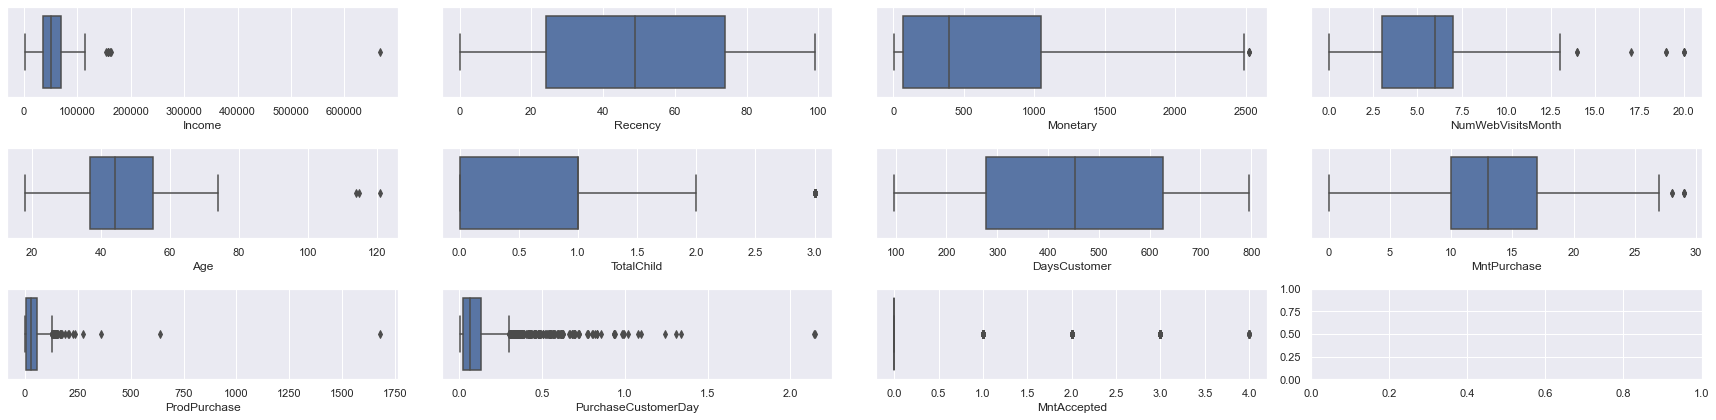

In [19]:
multi_plot(df, num_cols, sns.boxplot)

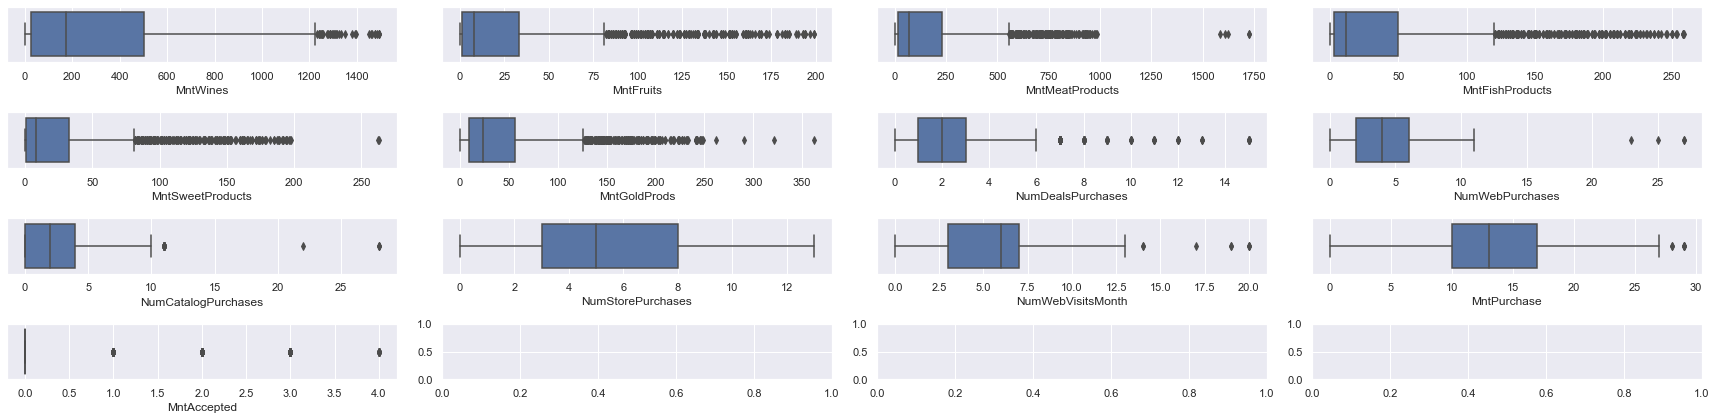

In [20]:
num_cols = [col for col in df.columns if col.startswith('Mnt') or col.startswith('Num')]

multi_plot(df, num_cols, sns.boxplot)

A partir da análise visual das distribuições percebe-se que:
- As variáveis Mnt não estão tão bem distribuídas como MntPurchase, mas podem ser relevantes na hora da modelagem;
- Recency e days customers são quase constantes;
- Para modelos sensíveis aos outliers, é interessante tratar as variáveis: Income, ProdPurchase, PurchaseCustomerDay, NumWebPurchases.

#### Correlação

<AxesSubplot:>

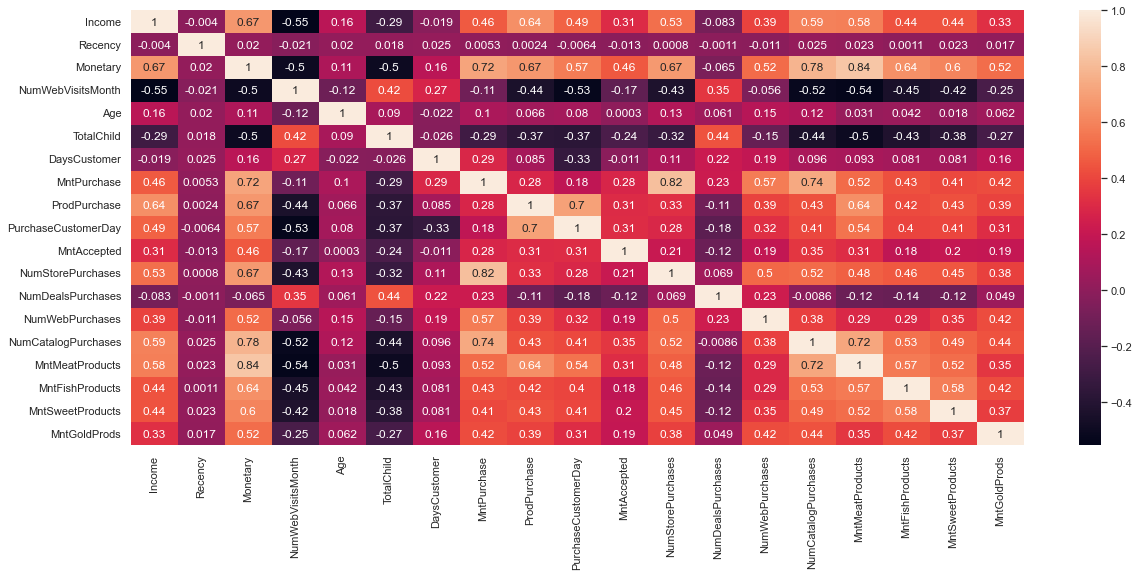

In [21]:
corr_cols = ['Income', 'Recency', 'Monetary', 'NumWebVisitsMonth', 'Age', 
            'TotalChild', 'DaysCustomer', 'MntPurchase', 'ProdPurchase', 
            'PurchaseCustomerDay', 'MntAccepted', 'NumStorePurchases',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
plt.figure(figsize=(20,8))
sns.heatmap(df[corr_cols].corr(), annot=True)

In [22]:
cat_cols = ['Education', 'Marital_Status', 'AgeRange']
for col in cat_cols:
    print('Cheking: ', col)
    crosstab = pd.crosstab(df[col], df['Response'])
    chi2_check(crosstab)
    print('')

Cheking:  Education
probability=0.95000, critical=9.48773, stat=23.07610
Dependent (reject H0)
significance=0.05000, p=0.00012
Dependent (reject H0)

Cheking:  Marital_Status
probability=0.95000, critical=7.81473, stat=50.79570
Dependent (reject H0)
significance=0.05000, p=0.00000
Dependent (reject H0)

Cheking:  AgeRange
probability=0.95000, critical=5.99146, stat=6.78117
Dependent (reject H0)
significance=0.05000, p=0.03369
Dependent (reject H0)



Sobre as correlações:
- Income tem correlação positiva com as variáveis 'Purchase' e negativa com o número de visitas no Website, isso gera a seguinte pergunta: Quem ganha mais, visita menos o site?
- Aparentemente o número de visitas no site está correlacionado com a busca por promoções e o quantidade de filhos que se tem em casa. O total de filhos influência no valor gasto e/ou no canal de compras?
- As váriaveis Education, Martial_Status e AgeRange tem algum grau de associação com a variavel alvo. 

#### Análise Bivariada

In [23]:
df['AcceptedLastOffer'] = df['Response'].astype(str)
df['TotalChild'] = df['TotalChild'].astype(str)
df['MntAccepted'] = df['MntAccepted'].astype(str)

In [24]:
fig = px.scatter(df, x='Income', y='Monetary', color='AcceptedLastOffer', 
                 color_discrete_sequence=['red', 'blue'], title='Valor Ganho x Valor Gasto')
fig.show()

In [25]:
fig = px.scatter(df, x='Income', y='NumWebVisitsMonth', color='AcceptedLastOffer', 
                 color_discrete_sequence=['red', 'blue'], title='Número de Visitas Web x Renda')
fig.show()

In [26]:
aux_df = df.groupby(['AcceptedLastOffer', 'TotalChild'])['NumWebVisitsMonth'].sum().reset_index()
fig = px.bar(aux_df, x='AcceptedLastOffer', y='NumWebVisitsMonth', color='TotalChild',
             barmode='group', height=400, title='Qtde Filhos x Visitas Web')
fig.show()

In [27]:
aux_df = df.groupby(['AcceptedLastOffer', 'TotalChild'])['NumWebPurchases'].sum().reset_index()
fig = px.bar(aux_df, x='AcceptedLastOffer', y='NumWebPurchases', color='TotalChild',
             barmode='group', height=400, title='Qtde Filhos x Compras Web')
fig.show()

In [28]:
aux_df = df.groupby(['AcceptedLastOffer', 'TotalChild'])['NumStorePurchases'].sum().reset_index()
fig = px.bar(aux_df, x='AcceptedLastOffer', y='NumStorePurchases', color='TotalChild',
             barmode='group', height=400, title='Qtde Filhos x Compras Web')
fig.show()

In [29]:
aux_df = df.groupby(['AcceptedLastOffer', 'AgeRange'])['Monetary'].sum().reset_index()
fig = px.bar(aux_df, x='AcceptedLastOffer', y='Monetary', color='AgeRange',
             barmode='group', height=400, title='Valor Gasto x Idade')
fig.show()

In [30]:
aux_df = df.groupby(['AcceptedLastOffer', 'Education'])['Monetary'].sum().reset_index()
fig = px.bar(aux_df, x='AcceptedLastOffer', y='Monetary', color='Education',
             barmode='group', height=400, title='Valor Gasto x Educação')
fig.show()

In [31]:
aux_df = df.groupby(['AcceptedLastOffer', 'MntAccepted'])['MntPurchase'].sum().reset_index()
fig = px.bar(aux_df, x='AcceptedLastOffer', y='MntPurchase', color='MntAccepted',
             barmode='group', height=400, title='Qtde de ofertas aceitas X Total de transações')
fig.show()

In [32]:
aux_df = df.groupby(['AcceptedLastOffer', 'Marital_Status'])['Monetary'].sum().reset_index()
fig = px.bar(aux_df, x='AcceptedLastOffer', y='Monetary', color='Marital_Status',
             barmode='group', height=400, title='Valor gasto X Status relacionamento')
fig.show()

Sobre a análise bivariada:
- Tanto para os clientes que aceitaram a última campanha quanto para os que não o valor gasto nos produtos cresceu junto da renda familiar;
- O número de visitas ni site não aparente ser impactado diretamente pela renda familiar;
- Um número elevado de cliente com filhos visitaram o website, porém, para aqueles que aceitaram a última campanha o numero de filhos nao teve muita influência;
- A base é composta por adultos entre 24 e 64 anos;
- A quantidade de transações realizadas é elevada para aqueles que não aceitaram nenhuma oferta das campanhas de marketing.